<a href="https://colab.research.google.com/github/Braindead-Zombies/TSFTasks-2022-/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First task : Prediction using Supervised ML
Predicting student's score using the number of study hours.


Author : Amina ELHALI

In [30]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error
 

In [17]:
#Reading the data 
data=pd.read_csv("http://bit.ly/w-data")
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [19]:
#Check if there is null value in Dataset
data.isnull == True 

False

There is no null value in the Dataset so, we can now visual our Data.

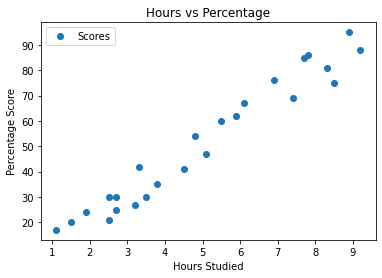

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, there looks clearly that there is a positive linear relation between "Hours Studied" and "percentage of score".

## Training the Model



1.   Splitting the Data




In [7]:
X= data.iloc[:, :-1].values  
Y= data.iloc[:, 1].values 


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)




2.   Training the Model using Linear Regression model






In [11]:

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("---------Training complete----------")

Training complete.


Now we plot the regression line for the test data

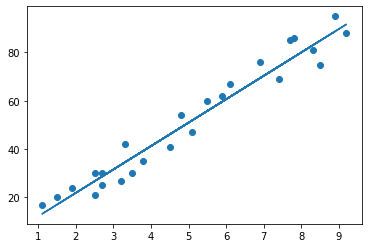

In [12]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Predicting the percentage of Marks

In [24]:
pred_Y = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours':[i[0] for i in X_test], 'Prediction Marks':[k for k in pred_Y]})
prediction

,Hours,Prediction Marks
0,1.5,17.042892
1,3.2,33.516954
2,7.4,74.217577
3,2.5,26.733516
4,5.9,59.681640
5,3.8,39.331329
6,1.9,20.919142
7,7.8,78.093827
8,6.9,69.372265


### Comparing the Predicted Marks with the Actual Marks

In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_Y})  
df 

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265




Visually Comparing the Predicted Marks with the Actual Marks




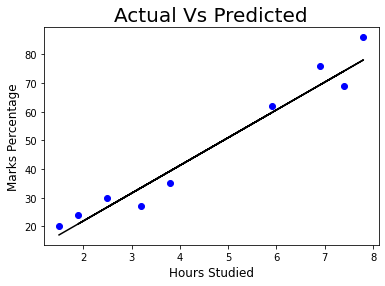

In [28]:
plt.scatter(x=X_test,y=Y_test, color='blue')
plt.plot(X_test, pred_Y, color='black')
plt.title('Actual Vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


### Evaluating the Model

In [31]:
#Calculating the accuracy of model
print('Mean Absolute Error:', mean_absolute_error(Y_test, pred_Y))

Mean Absolute Error: 4.691397441397446


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.


**Question : What will be the predicted score of a student if he/she studies for 9.25 hrs per day?**

In [35]:
#Predicted Score if the Student studied for 9.25 hours per day.
hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 92.14523314523316
